In [3]:
#for an interactive plot
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [6]:
#Display the data frame with city names
df_cities= pd.DataFrame({"City": cities})

df_cities

City
0           bluff
1          sivaki
2        souillac
3      chokurdakh
4       taolanaro
..            ...
623         avera
624     chukhloma
625  port lincoln
626  christchurch
627         salym

[628 rows x 1 columns]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Initialize empty list to store weather data received from weather api for each of the cities above
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [8]:
#Initialize counter for print log sets of 50 cities
record_counter = 0
set_counter = 1

# URL for API Call and api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key 

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    #API request for the above series of cities
    query_url = url + "&q=" + city
    # Convert to json
    response = requests.get(query_url).json()
    
    if record_counter < 50:
        record_counter += 1
        
    else:
        set_counter += 1
        record_counter = 1
    
    #Include a print log of each city as it's being processed (with the city number and city name and the complete url)
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city.capitalize()))
    print(query_url)
    
    
    #try-except block for error free execution when city not found
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bluff
Processing record 2 of set 1 | Sivaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=sivaki
Processing record 3 of set 1 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=souillac
Processing record 4 of set 1 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=chokurdakh
Processing record 5 of set 1 | Taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=taolanaro
City not found!
Processing record 6 of set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=busselton
Processing record 7 of s

Processing record 4 of set 2 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=hamilton
Processing record 5 of set 2 | Abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=abu dhabi
Processing record 6 of set 2 | Port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=port alfred
Processing record 7 of set 2 | Norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=norman wells
Processing record 8 of set 2 | New norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=new norfolk
Processing record 9 of set 2 | Maryborough
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=maryborough
Processing record 10 of set 2 | Butaritari
http://api.openwe

Processing record 7 of set 3 | Penzance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=penzance
Processing record 8 of set 3 | Killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=killybegs
Processing record 9 of set 3 | Barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=barentsburg
City not found!
Processing record 10 of set 3 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=khatanga
Processing record 11 of set 3 | Port ellen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=port ellen
City not found!
Processing record 12 of set 3 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=tuktoyaktuk
Processing record 13 of set 3 | Sam

Processing record 10 of set 4 | Clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=clyde river
Processing record 11 of set 4 | Puyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=puyang
Processing record 12 of set 4 | Kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kasongo-lunda
Processing record 13 of set 4 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=nuuk
Processing record 14 of set 4 | Loiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=loiza
Processing record 15 of set 4 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=nouadhibou
Processing record 16 of set 4 | Ossora
http://api.openweathermap.org/data/2.5/we

Processing record 14 of set 5 | Pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=pacific grove
Processing record 15 of set 5 | Omaruru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=omaruru
Processing record 16 of set 5 | General pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=general pico
Processing record 17 of set 5 | Carauari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=carauari
Processing record 18 of set 5 | Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=pierre
Processing record 19 of set 5 | Ino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=ino
Processing record 20 of set 5 | Rocha
http://api.openweathermap.org/data/2.5/wea

Processing record 17 of set 6 | Negombo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=negombo
Processing record 18 of set 6 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kodiak
Processing record 19 of set 6 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=inuvik
Processing record 20 of set 6 | Verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=verkhoyansk
Processing record 21 of set 6 | Tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=tateyama
Processing record 22 of set 6 | Namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=namtsy
Processing record 23 of set 6 | Sibirtsevo
http://api.openweathermap.org/data/2.5/weather?

Processing record 21 of set 7 | Beausejour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=beausejour
Processing record 22 of set 7 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=cherskiy
Processing record 23 of set 7 | Broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=broken hill
Processing record 24 of set 7 | Charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=charters towers
Processing record 25 of set 7 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=lima
Processing record 26 of set 7 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=thinadhoo
Processing record 27 of set 7 | Barabinsk
http://api.openweather

Processing record 26 of set 8 | Encheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=encheng
Processing record 27 of set 8 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=egvekinot
Processing record 28 of set 8 | San quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=san quintin
Processing record 29 of set 8 | Svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=svetlyy
City not found!
Processing record 30 of set 8 | Clarence town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=clarence town
Processing record 31 of set 8 | Merritt island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=merritt island
Processing record 32 of set 8 | Buchanan

Processing record 29 of set 9 | Gambela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=gambela
Processing record 30 of set 9 | Tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=tomatlan
Processing record 31 of set 9 | Gwadar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=gwadar
Processing record 32 of set 9 | Garanhuns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=garanhuns
Processing record 33 of set 9 | Porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=porto novo
Processing record 34 of set 9 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=poum
Processing record 35 of set 9 | Constitucion
http://api.openweathermap.org/data/2.5/weathe

Processing record 33 of set 10 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=baykit
Processing record 34 of set 10 | Taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=taltal
Processing record 35 of set 10 | San sebastian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=san sebastian
Processing record 36 of set 10 | Cedar city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=cedar city
Processing record 37 of set 10 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=karratha
Processing record 38 of set 10 | Vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=vila franca do campo
Processing record 39 of set 10 | Fort-shevchen

Processing record 37 of set 11 | Mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mount gambier
Processing record 38 of set 11 | Labutta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=labutta
City not found!
Processing record 39 of set 11 | Mulchen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=mulchen
Processing record 40 of set 11 | Yelizovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=yelizovo
Processing record 41 of set 11 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=camacha
Processing record 42 of set 11 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=bubaque
Processing record 43 of set 11 | La baule-escoublac
http:/

Processing record 41 of set 12 | Flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=flin flon
Processing record 42 of set 12 | Kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=kenai
Processing record 43 of set 12 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=olinda
Processing record 44 of set 12 | Athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=athabasca
Processing record 45 of set 12 | Aguada de cima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=aguada de cima
Processing record 46 of set 12 | Lokosovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7cf0bb5458a870743b2b6578cfcc1f3d&q=lokosovo
Processing record 47 of set 12 | Berlevag
http://api.openweathermap.or

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

City  Cloudiness Country        Date  Humidity   Temp    Lat     Lng  \
0       bluff          15      AU  1573361481         9  89.69 -23.58  149.07   
1      sivaki         100      RU  1573361481        92  17.35  52.63  126.75   
2    souillac          37      FR  1573361481        87  42.80  45.60   -0.60   
3  chokurdakh          71      RU  1573361396        96  -2.87  70.62  147.90   
4   busselton          15      AU  1573361482        35  82.00 -33.64  115.35   

   Wind Speed  
0        2.98  
1       10.92  
2        3.36  
3        5.46  
4       12.41

In [10]:
# Changing time stamp to date time format
#Capitalize city name
weather_data["Date"]=pd.to_datetime(weather_data["Date"], unit='s')
weather_data["City"]= weather_data["City"].str.capitalize()


weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 9 columns):
City          565 non-null object
Cloudiness    565 non-null int64
Country       565 non-null object
Date          565 non-null datetime64[ns]
Humidity      565 non-null int64
Temp          565 non-null float64
Lat           565 non-null float64
Lng           565 non-null float64
Wind Speed    565 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 39.9+ KB


In [11]:
# Export the city data into a .csv file
weather_data.to_csv(output_data_file)

#Display dataframe
weather_data.head()

City  Cloudiness Country                Date  Humidity   Temp    Lat  \
0       Bluff          15      AU 2019-11-10 04:51:21         9  89.69 -23.58   
1      Sivaki         100      RU 2019-11-10 04:51:21        92  17.35  52.63   
2    Souillac          37      FR 2019-11-10 04:51:21        87  42.80  45.60   
3  Chokurdakh          71      RU 2019-11-10 04:49:56        96  -2.87  70.62   
4   Busselton          15      AU 2019-11-10 04:51:22        35  82.00 -33.64   

      Lng  Wind Speed  
0  149.07        2.98  
1  126.75       10.92  
2   -0.60        3.36  
3  147.90        5.46  
4  115.35       12.41

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

<IPython.core.display.Javascript object>


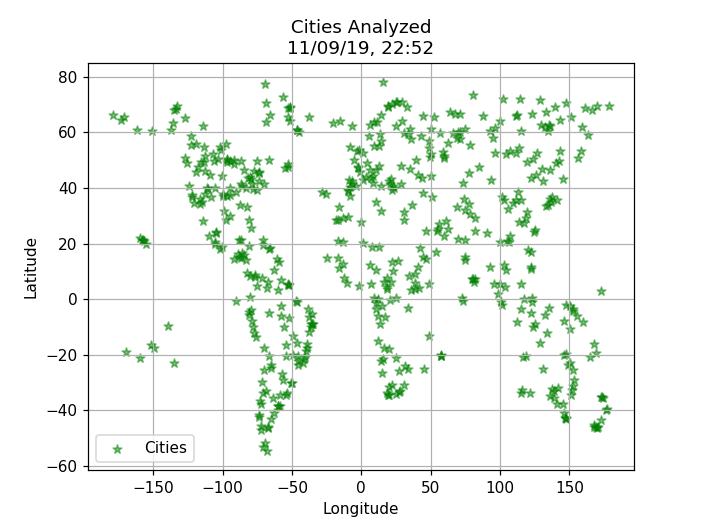

In [12]:
#Checking global distribution of cities
#If distribution is not good re-generate random cities for avoiding data bias due to limited geographical spead of cities

fig, ax = plt.subplots()
ax.scatter(weather_data['Lng'], weather_data['Lat'],marker='*',color='green', alpha = 0.5,label="Cities")

#for the current time to be printed in the map
date_time = datetime.datetime.now()

ax.set_title(" Cities Analyzed \n{}".format(date_time.strftime("%x, %H:%M")))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

plt.savefig("Map_city_distribution.png")




<IPython.core.display.Javascript object>


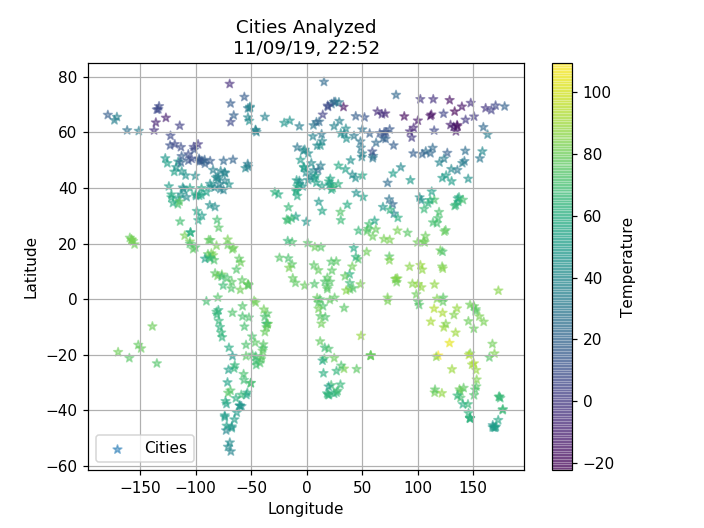

In [13]:
#For report gradient color bar based on attribute(temperature, Humidy, Windspeed) has been used
fig, axy = plt.subplots()
s=axy.scatter(weather_data['Lng'], weather_data['Lat'],c=weather_data['Temp'],marker='*', alpha = 0.5,label="Cities")
cb = plt.colorbar(s)
cb.set_label('Temperature')

#for the current time to be printed in the map
date_time = datetime.datetime.now()

axy.set_title(" Cities Analyzed \n{}".format(date_time.strftime("%x, %H:%M")))
axy.set_xlabel('Longitude')
axy.set_ylabel('Latitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

Latitude vs. Temperature Plot


<IPython.core.display.Javascript object>


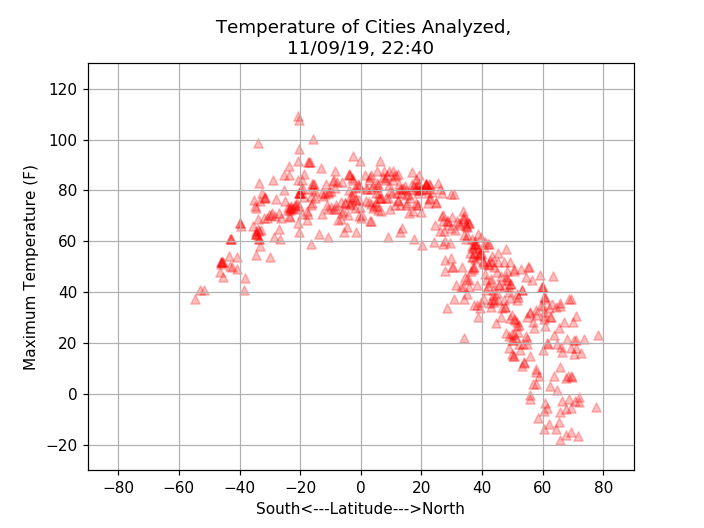

In [250]:
#Plot 2
fig, ay = plt.subplots()
date_time = datetime.datetime.now()
#N=len(new_cities)
#colors = np.random.rand(N)
ay.scatter(weather_data['Lat'], weather_data['Temp'],marker='^',color='red', alpha = 0.25)

ay.set_title(" Temperature of Cities Analyzed,\n{}" .format(date_time.strftime("%x, %H:%M")))
ay.set_xlabel("South<---Latitude--->North")
ay.set_ylabel("Maximum Temperature (F)")
ay.set_xlim(-90,90)
ay.set_ylim(-30,130)
plt.grid()
plt.show()

plt.savefig("Temp_distribution.png")


Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


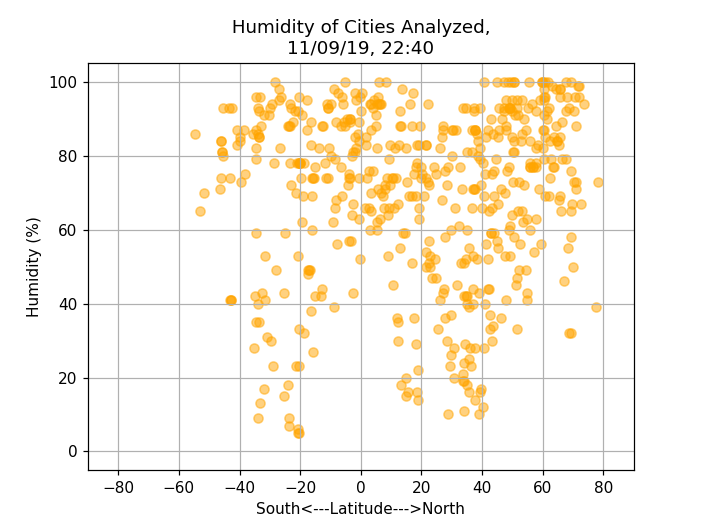

In [251]:
fig, az=  plt.subplots()

date_time = datetime.datetime.now()

az.scatter(weather_data['Lat'], weather_data['Humidity'],marker='o', color="orange", alpha = 0.5)
az.set_title(" Humidity of Cities Analyzed, \n{}" .format(date_time.strftime("%x, %H:%M")))
az.set_xlabel("South<---Latitude--->North")
az.set_ylabel("Humidity (%)")
az.set_xlim(-90,90)
az.set_ylim(0-5,100+5)
plt.grid()
plt.show()

plt.savefig("Humidity_distribution.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


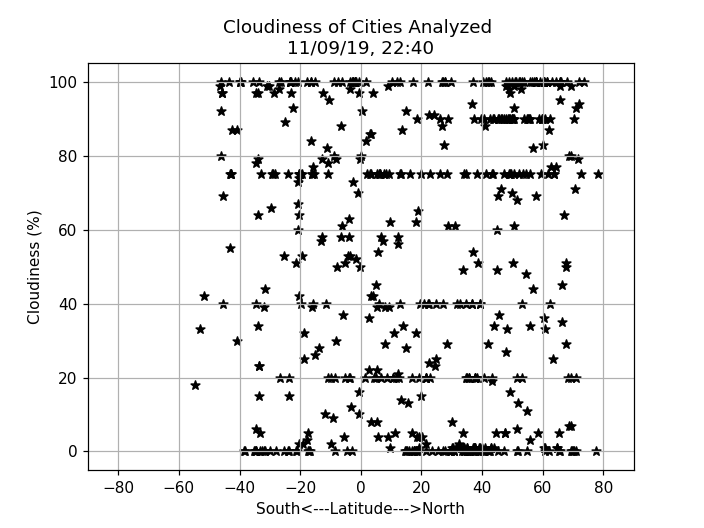

In [252]:
fig, ax1 = plt.subplots()
ax1.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='*',color='black',label="Cities")

#for the current time to be printed in the map
date_time = datetime.datetime.now()

ax1.set_title("Cloudiness of Cities Analyzed \n{}".format(date_time.strftime("%x, %H:%M")))
ax1.set_xlabel('South<---Latitude--->North')
ax1.set_ylabel('Cloudiness (%)')
ax1.set_xlim(-90,90)
ax1.set_ylim(0-5,100+5)
plt.grid()
plt.show()

plt.show()

plt.savefig("Cloudiness_distribution.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


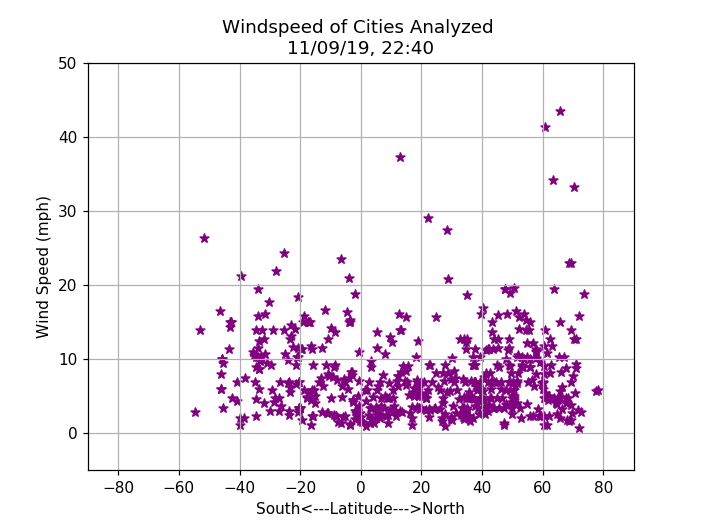

In [253]:
fig, ax2 = plt.subplots()
ax2.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='*',color='purple',label="Cities")

#for the current time to be printed in the map
date_time = datetime.datetime.now()

ax2.set_title("Windspeed of Cities Analyzed \n{}".format(date_time.strftime("%x, %H:%M")))
ax2.set_xlabel('South<---Latitude--->North')
ax2.set_ylabel('Wind Speed (mph)')
ax2.set_xlim(-90,90)
ax2.set_ylim(0-5,50)
plt.grid()
plt.show()

plt.savefig("Windspeed_distribution.png")